# Neural Network for Handwritten Numbers

## Training Data
The following data is from http://yann.lecun.com/exdb/mnist/

First we read an array of training data and corresponding labels (true answers)
The goal of the neural network is to label new images similar to the training data.

In [1]:
import mnist_util
import numpy as np
np.set_printoptions(precision=3, suppress=True)
training_labels = mnist_util.read_labels('mnist/train-labels.idx1-ubyte')
training_images = mnist_util.read_images('mnist/train-images.idx3-ubyte')

Lets have a look at the first 100 training images and corresponding labels:

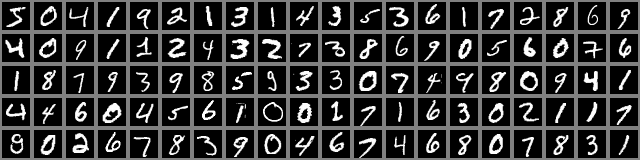

In [2]:
mnist_util.image_matrix(training_images[:100].reshape(5,20,28,28))

In [3]:
training_labels[:100].reshape(5,20)

array([[5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
       [4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6],
       [1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1],
       [4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7],
       [9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1]],
      dtype=uint8)

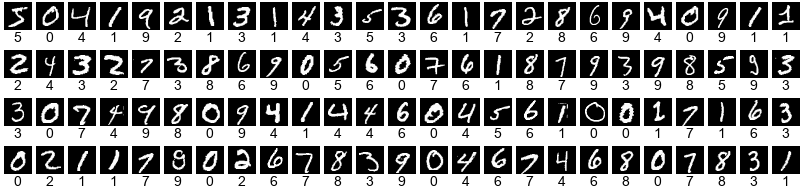

In [4]:
mnist_util.labeled_image_array(training_images[:100].reshape(100,28,28), 
                               [[str(l) for l in training_labels[:100]]])

## The neural network

We define the network with three layers:
 1. The input layer has 28  28 = 784 neurons, one for each pixel of an input image
 2. An intermediate layer of 16 neurons
 3. An output layer of 10 neurons representing the labels 0 through 9

In [5]:
import neural
nn = neural.NeuralNetwork([28*28, 16, 10])
training_size, = training_labels.shape
expected_output = np.zeros((training_size, 10))
for i, label in enumerate(training_labels):
    expected_output[i][label] = 1
training_data = training_images / 255.0

In [16]:
import tqdm.notebook
M = 1000
for i in tqdm.notebook.trange(600):
    output = nn.train(training_data[:M], expected_output[:M])
    np.set_printoptions(precision=3, suppress=True)
    if i%100 == 99:
        test = nn.apply(training_data[1000:1100])
        loss = np.mean(np.square(expected_output[:M] - output)) 
        training_missclass = np.sum(np.argmax(output, axis=1) != training_labels[:M])
        test_missclass     = np.sum(np.argmax(test, axis=1) != training_labels[1000:1100])
        print(i+1, loss, training_missclass, test_missclass)
result = np.argmax(output, axis=1)
np.sum(result != training_labels[:M])

100 0.014989146321128391 58 19
200 0.012219072070797006 52 19
300 0.010301426705238271 42 17
400 0.008831507919107738 31 17
500 0.007661271303242289 25 17
600 0.0067527122965427904 24 17



24

In [22]:
def result_analysis(images, output, labels):
    result = np.argmax(output, axis=1)

    C_CORR = ((0,0,0),(255,255,255))
    C_ERROR = ((255,255,255), (255,0,0))

    C_MAP = [(255,128,128),(255,192,64), (255,255,64),(128,255,128),(255,255,255)]

    colors1 = [(C_CORR if w==c else C_ERROR) for w, c in zip(result, labels)]
    colors2 = [(0, C_MAP[int(4*o[w])]) for w, o in zip(result, output)]

    labels1=[(f'{w}' if w==c else f' {w} ({c}) ') for w, c in zip(result, labels)]
    labels2=[f' {o[w]:0.2f} ' for w, o in zip(result, output)]

    return mnist_util.labeled_image_array(images.reshape(images.shape[0],28,28), 
                                   [labels1, labels2], [colors1, colors2])   

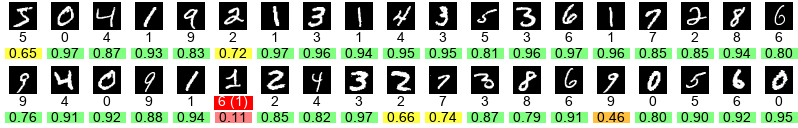

In [23]:
result_analysis(training_images[:38], output[:38], training_labels[:38])

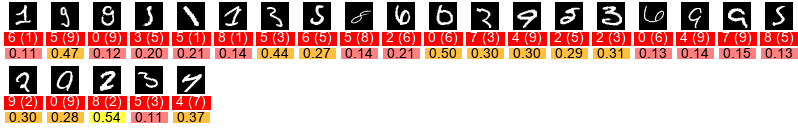

In [24]:
errors = result != training_labels[:M]
result_analysis(training_images[:M][errors], output[:M][errors], training_labels[:M][errors])

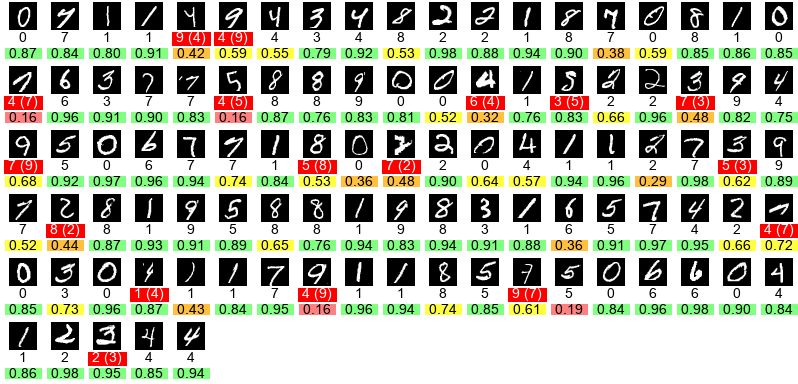

In [25]:
output_test = nn.apply(training_data[1000:1100])
result_analysis(training_images[1000:1100], output_test, training_labels[1000:1100])

In [21]:
x = training_data[0]
z = w.T @ x + b

NameError: name 'w' is not defined

In [ ]:
z

In [ ]:
from neural import sigmoid as s
s(z)

In [ ]:
nn.apply(training_data[:1])

In [ ]:
def L(b):
    z = w.T @ x + b
    error = (s(z) - expected_output[0])
    return error.dot(error)
L(b)

In [ ]:
d_cost = 2*(s(z) - expected_output[0])
d_b = d_cost * neural.sigmoid_derivative(s(z))

In [ ]:
d_cost, d_b

In [ ]:
e0 = np.array([1.,0,0,0,0,0,0,0,0,0])
e5 = np.array([0.,0,0,0,0,1,0,0,0,0])

In [ ]:
h = 0.03
(L(b + h*e0) - L(b))/h, (L(b + h*e5) - L(b))/h

In [ ]:
d_w = d_cost * np.outer(x, neural.sigmoid_derivative(s(z)));
d_w[14*29]

In [ ]:
result = np.argmax(output, axis=1)
np.sum(result != training_labels[:M])

In [ ]:
incorrect = training_images[:M][result != training_labels[:M]]
mnist_util.image_matrix(incorrect.reshape(1,27,28,28))

In [ ]:
w = nn.weights[0]; np.min(w), np.max(w)

In [ ]:
u = 255*(w-np.min(w))/(np.max(w)-np.min(w)).astype('uint8')

In [ ]:
from PIL import Image
mnist_util.image_matrix(u.T.astype('uint8').reshape(1,16,28,28))

In [ ]:
nn.weights[1].T

In [ ]:
from PIL import Image, ImageDraw, ImageFont

In [ ]:
from PIL import Image, ImageDraw, ImageFont
im = Image.new('L', (600, 400), 200)
font = ImageFont.truetype(r'arial.ttf', 14)  
draw = ImageDraw.Draw(im)
bbox = draw.textbbox((10, 10), 'abcg', font=font)
draw.rectangle(bbox, fill=255)
print(bbox)
draw.text((10, 10), 'abcg', font=font, align ="left")
draw.text((10, 26), 'abcA', font=font, align ="left")
draw.text((10, 42), 'abcg', font=font, align ="left")
im

In [ ]:
font.getmetrics()

In [ ]:
images = incorrect.reshape(incorrect.shape[0],28,28)
labels = training_labels[:M][result != training_labels[:M]]
wrong = result[result != training_labels[:M]]
label_uq = set(labels); label_uq


In [ ]:
labels

In [ ]:
def labeled_image_array(images, max_width, *labels):
    n, im_h, im_w = images.shape
    font = ImageFont.truetype(r'arial.ttf', 14)
    uq_labels = set(l for lab in labels for l in lab)
    lbl_w = max(font.getsize(l)[0] for l in uq_labels)
    textheight = sum(font.getmetrics())
    box_w = 4 + max(im_w, lbl_w)
    box_h = 4 + im_h + textheight*len(labels)
    columns = min(n, max(1, max_width // box_w))
    rows = (n + columns - 1) // columns
    im = Image.new('L', (columns*box_w, rows*box_h), 255)
    draw = ImageDraw.Draw(im)
    for i, ims_data in enumerate(images):
        ims = Image.fromarray(ims_data, 'L')
        x = i % columns
        y = i // columns
        im.paste(ims, (2+x*box_w+(box_w-im_w)//2, 2+y*box_h))
        for k, lbl in enumerate(labels):
            draw.text((2+x*box_w+box_w//2, 4+y*box_h+im_h+k*textheight), lbl[i], font=font, anchor='mt')
            

    return im
labeled_image_array(images, 500, [str(l) for l in labels], [str(w) for w in wrong])

In [ ]:
width = max(draw.textbbox((0, 0), str(l), font=font)[2] for l in label_uq)
width